# Fourier Series
Any general waveform of finity energy $x(t)$ (square integrable) can be represented as weighted sum of trigonometric functions.
\begin{equation}
f(x) \simeq \frac{a_0}{2} + \sum_{n=1}^{\infty}\left\{a_n\cos(\frac{n\pi{x}}{p}) + b_n\sin(\frac{n\pi{x}}{p})\right\}
\end{equation}
where the Fourier coefficients $a_n, b_n$ are defined by
\begin{equation}
a_n = \frac{1}{p}\int_{-p}^{p}f(x)\cos(\frac{n\pi{x}}{p})dx, n\geq0\\
b_n = \frac{1}{p}\int_{-p}^{p}f(x)\sin(\frac{n\pi{x}}{p})dx, n\geq1
\end{equation}

## Square function (even)
\begin{equation}
f(x) = \left\{ \begin{array}{rcl}
A, & -\frac{1}{2}T_p + nT < x < \frac{1}{2}T_p + nT  \\ 
0, & \frac{1}{2}T_p + nT < x < \frac{3}{2}T_p + nT 
\end{array}\right.
\end{equation}
where $n \in R$, $T_p = \pi$ and $T = 2\pi$.

\begin{eqnarray}
a_0 &=& \frac{1}{T}\int_0^T f(t)dt \\
&=& \frac{1}{T}\int_{-\frac{T_p}{2}}^{\frac{T_p}{2}} Adt \\ 
&=& \frac{T_p}{T}A \\
&=& \frac{A}{2}
\end{eqnarray}

\begin{eqnarray}
a_n &=& \frac{2}{T}\int_0^T f(t)\cos(\omega_nt)dt \\
&=& \frac{2}{T}\int_{-\frac{T_p}{2}}^{\frac{T_p}{2}} A\cos(\omega_nt)dt \\ 
&=& \frac{2A}{\omega_n T}\int_{-\frac{T_p}{2}}^{\frac{T_p}{2}} \cos(\omega_nt)d\omega_nt \\
&=& \frac{4A}{\omega_n T}\sin(\frac{\omega_n T_p}{2}) \\
&=& \frac{2A}{n\pi}\sin(\frac{n\pi}{2})
\end{eqnarray}

\begin{equation}
a_n = \left\{ \begin{array}{lcl}
0, & n & even, n\neq 0  \\ 
(-1)^{\frac{n-1}{2}}\frac{2A}{n\pi}, & n & odd
\end{array}\right.
\end{equation}

\begin{eqnarray}
b_n &=& \frac{2}{T}\int_0^T f(t)\sin(\omega_nt)dt \\
&=& \frac{2}{T}\int_{-\frac{T_p}{2}}^{\frac{T_p}{2}} A\sin(\omega_nt)dt \\ 
&=& 0
\end{eqnarray}

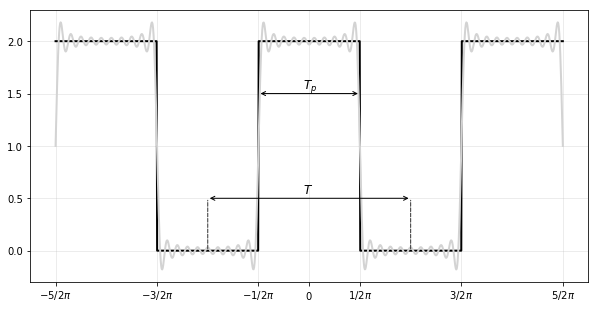

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier coefficients
def a0(A, X):
    return A/2 * np.ones(len(X))

def an(A, n):
    if n%2==0:
        return 0
    return (-1)**((n-1)/2)*(2*A)/(n*np.pi)

def Plot(x, y, s, T):
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.plot(x,y,'-', color='black', lw=2,label="Signal")
    plt.plot(x,s,'-', color='#d3d3d3', lw=2,label="Fourier series approximation")
    plt.xticks([-5/2*np.pi, -3/2*np.pi, -1/2*np.pi, 0, 1/2*np.pi, 3/2*np.pi, 5/2*np.pi],
               [r'$-5/2\pi$', r'$-3/2\pi$', r'$-1/2\pi$', r'$0$',r'$1/2\pi$', r'$3/2\pi$', r'$5/2\pi$'])

    # the arrow
    ax.annotate('', xy=(-T/2,0.5), xytext=(-T/2,0),
                arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'ec': '#333333'}, va='center')
    ax.annotate('', xy=(T/2,0.5), xytext=(T/2,0),
                arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'ec': '#333333'}, va='center')
    ax.annotate('', xy=(T/2,0.5), xytext=(-T/2,0.5),
                arrowprops={'arrowstyle': '<->'}, va='center')
    ax.annotate('', xy=(T/4,1.5), xytext=(-T/4,1.5),
                arrowprops={'arrowstyle': '<->'}, va='center')
    plt.text(-0.2,  1.55, r'$T_p$', {'color': 'k', 'fontsize': 12})
    plt.text(-0.2,  0.55, r'$T$', {'color': 'k', 'fontsize': 12})
    plt.show()
    

def Series(n):
    # Initial parameters
    A = 2
    N = 1000
    T = 2*np.pi
    f = 1/T

    x = np.linspace(-5/2*np.pi,5/2*np.pi,N)
    y = A/2*(1 + np.sign(np.cos(2*np.pi*f*x)))

    s =  a0(A, x) + sum(an(A, i) * np.cos(i*x) for i in range(1,n+1))
    Plot(x,y,s,T)
    
Series(19)

## Sawtooth function (odd)
\begin{equation}
f(x) = \frac{2A}{T}x \quad (n - \frac{1}{2})T < x < (n - \frac{1}{2})T
\end{equation}
where $n \in R$, and $T = 2\pi$.

\begin{eqnarray}
a_0 &=& \frac{1}{T}\int_0^T f(t)dt \\
&=& \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} \frac{2A}{T}tdt \\ 
&=& 0
\end{eqnarray}

\begin{eqnarray}
a_n &=& \frac{2}{T}\int_0^T f(t)\cos(\omega_nt)dt \\
&=& \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} \frac{2A}{T}t\cos(\omega_nt)dt \\ 
&=& 0
\end{eqnarray}

\begin{eqnarray}
b_n &=& \frac{2}{T}\int_0^T f(t)\sin(\omega_nt)dt \\
&=& \frac{2}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} \frac{2A}{T}t\sin(\omega_nt)dt \\ 
&=& -\frac{4A}{\omega_nT^2}\int_{-\frac{T}{2}}^{\frac{T}{2}}td\cos(\omega_nt) \\
&=& -\frac{4A}{\omega_nT^2} \left[ t\cdot\cos(\omega_nt)\big\vert_{-\frac{T}{2}}^{\frac{T}{2}} - \int_{-\frac{T}{2}}^{\frac{T}{2}} \cos(\omega_nt)dt \right] \\
&=& -\frac{4A}{\omega_nT^2} \left[ T\cos(\frac{\omega_n T}{2}) -\frac{2}{\omega_n}\sin(\frac{\omega_n T}{2}) \right]
\end{eqnarray}

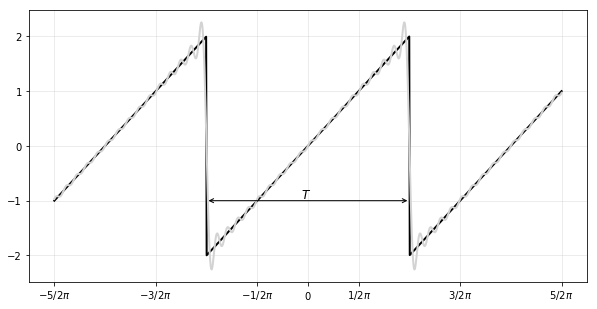

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Fourier coefficients
def bn(T, A, n):
    w_n = 2*np.pi*n/T
    return -(4*A)/(w_n*T**2)*(T*np.cos(w_n*T/2) - 2/(w_n)*np.sin(w_n*T/2))

def Plot(x,y,s,T):
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.plot(x,y,'-', color='black', lw=2,label="Signal")
    plt.plot(x,s,'-', color='#d3d3d3', lw=2,label="Fourier series approximation")
    plt.xticks([-5/2*np.pi, -3/2*np.pi, -1/2*np.pi, 0, 1/2*np.pi, 3/2*np.pi, 5/2*np.pi],
               [r'$-5/2\pi$', r'$-3/2\pi$', r'$-1/2\pi$', r'$0$',r'$1/2\pi$', r'$3/2\pi$', r'$5/2\pi$'])

    # the arrow
    ax.annotate('', xy=(T/2,-1), xytext=(-T/2,-1),
                arrowprops={'arrowstyle': '<->'}, va='center')
    plt.text(-0.2,  -0.95, r'$T$', {'color': 'k', 'fontsize': 12})
    
def Series(n):
    A = 2
    T = 2*np.pi
    f = 1/T
    
    x = np.linspace(-5/2*np.pi,5/2*np.pi,1000)
    y = A * signal.sawtooth(x-T/2)

    s =  sum(bn(T, A, i) * np.sin(i*x) for i in range(1,n+1))
    Plot(x,y,s,T)
    
Series(19)

## Delta function
Delta function can be represented as the generalized form of the square function.

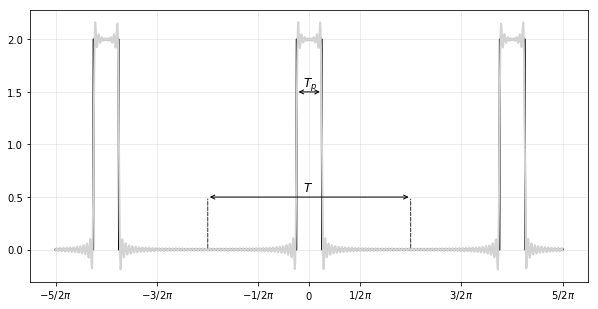

In [30]:
# general form
import numpy as np
import matplotlib.pyplot as plt

# Fourier coefficients
def a0(T, T_p, A, X):
    return T_p/T *A * np.ones(len(X))

def an(T, T_p, A, n):
    w_n = 2*m.pi*n/T
    return (4*A)/(w_n * T)*np.sin((w_n * T_p)/2)

def Plot(x,y,s,T,T_p): 
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.plot(x,y,'-', color='black', lw=2,label="Signal")
    plt.plot(x,s,'-', color='#d3d3d3', lw=2,label="Fourier series approximation")
    plt.xticks([-5/2*np.pi, -3/2*np.pi, -1/2*np.pi, 0, 1/2*np.pi, 3/2*np.pi, 5/2*np.pi],
               [r'$-5/2\pi$', r'$-3/2\pi$', r'$-1/2\pi$', r'$0$',r'$1/2\pi$', r'$3/2\pi$', r'$5/2\pi$'])

    # the arrow
    ax.annotate('', xy=(-T/2,0.5), xytext=(-T/2,0),
                arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'ec': '#333333'}, va='center')
    ax.annotate('', xy=(T/2,0.5), xytext=(T/2,0),
                arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'ec': '#333333'}, va='center')
    ax.annotate('', xy=(T/2,0.5), xytext=(-T/2,0.5),
                arrowprops={'arrowstyle': '<->'}, va='center')
    ax.annotate('', xy=(T_p/2,1.5), xytext=(-T_p/2,1.5),
                arrowprops={'arrowstyle': '<->'}, va='center')
    plt.text(-0.2,  1.55, r'$T_p$', {'color': 'k', 'fontsize': 12})
    plt.text(-0.2,  0.55, r'$T$', {'color': 'k', 'fontsize': 12})
    plt.show()
    
def Series(n, delta):
    # Initial parameters
    A = 2
    T = 2*m.pi
    T_p = m.pi / delta
    f = 1/T

    x = np.linspace(-5/2*np.pi,5/2*np.pi,1000)
    y = []
    for i in X:
        if i > (-1/2*T_p) and i < (1/2*T_p) or i > (-1/2*T_p + T) and i < (1/2*T_p + T) or i > (-1/2*T_p - T) and i < (1/2*T_p - T):
            y.append(A)
        else:
            y.append(0)

    s =  a0(T, T_p, A, X) + sum(an(T, T_p, A, i) * np.cos(i*x) for i in range(1,n+1))
    Plot(x,y,s,T,T_p)
    
Series(60, 4)

## Rectified Linear Unit function (aperiod)
\begin{equation}
f(x) = \left\{\begin{array}{cl}
0,&-\pi < x \leq0\\
x,&0 < x < \pi\\
\end{array}\right.\
\end{equation}
\begin{equation}
f(x) \simeq \frac{a_0}{2} + \sum_{n=1}^{\infty}\left\{a_n\cos(nx) + b_n\sin(nx)\right\}
\end{equation}
\begin{eqnarray}
\frac{a_0}{2} &=& \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)dx \\ 
&=& \frac{1}{2\pi}\int_{0}^{\pi}xdx \\
&=& \frac{\pi}{4}
\end{eqnarray}
\begin{eqnarray}
a_n &=& \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos(nx)dx, n\geq1\\
&=& \frac{1}{\pi}\int_{0}^{\pi}x\cos(nx)dx\\
&=& \frac{1}{n\pi}\int_{0}^{\pi}xd\sin(nx)\\
&=& \frac{1}{n\pi}\left\{ \left[x\sin(nx)\right]_0^\pi - \int_{0}^{\pi}\sin(nx)dx \right\}\\
&=& -\frac{1}{n^2\pi}\int_{0}^{\pi}\sin(nx)dnx \\
&=& \frac{1}{n^2\pi}\left[\cos(nx)\right]_0^\pi \\
&=& \frac{-2}{n^2\pi},(n\geq1,odd)
\end{eqnarray}
\begin{eqnarray}
b_n &=& \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin(nx)dx, n\geq1\\
&=& \frac{1}{\pi}\int_{0}^{\pi}x\sin(nx)dx\\
&=& -\frac{1}{n\pi}\int_{0}^{\pi}xd\cos(nx)\\
&=& -\frac{1}{n\pi}\left\{ \left[x\cos(nx)\right]_0^\pi - \int_{0}^{\pi}\cos(nx)dx \right\}\\
&=& -\frac{1}{n\pi}\left[(-i)^n\pi-\frac{1}{n}\int_{0}^{\pi}\cos(nx)dnx\right] \\
&=& -\frac{1}{n\pi}\left\{(-i)^n\pi-\frac{1}{n}\left[\sin(nx)\right]_0^\pi\right\} \\
&=& \frac{(-1)^{n+1}}{n},(n\geq1)
\end{eqnarray}
\begin{equation}
f(x) \simeq \frac{\pi}{4} + \sum_{n\geq1,odd}\frac{-2}{n^2\pi}\cos(nx) + \sum_{n\geq1}\frac{(-1)^{n+1}}{n}\sin(nx)
\end{equation}

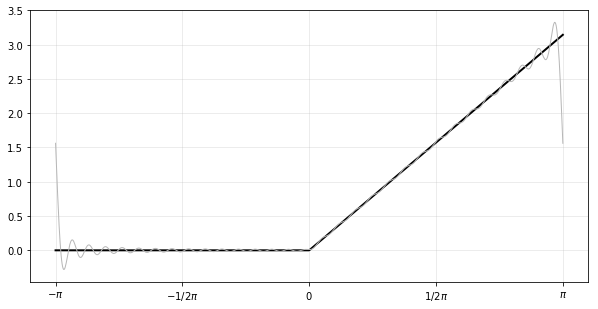

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier coefficients
def a0(x):
    return np.pi/4 * np.ones(len(x))

def an(n,x):
    if n%2==0:
        return 0
    return (-2)/(n**2*np.pi) * np.ones(len(x))

def bn(n,x):
    return (-1)**(n+1)/n * np.ones(len(x))


def Plot(x,y,s): 
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.plot(x,y,'-', color='black', lw=2,label="RELU")
    plt.plot(x,s,'-', color='#b7b7b7', lw=1,label="f2")
    
    plt.xticks([-np.pi, -1/2*np.pi, 0, 1/2*np.pi, np.pi], [r'$-\pi$', r'$-1/2\pi$', r'$0$',r'$1/2\pi$', r'$\pi$'])
    plt.show()
    
def Series(n):
    # Initial parameters
    N = 1000
    x = np.linspace(-np.pi, np.pi, N)
    y = np.where(x<0,0,x)

    s =  a0(x) + sum(an(i,x) * np.cos(i*x) + bn(i,x) * np.sin(i*x) for i in range(1,n+1))
    Plot(x,y,s)
    
Series(30)

## Reference:

- [Mathematics of the discrete Fourier transform](https://ccrma.stanford.edu/~jos/st/)
- [Fourier series - Wikipedia](https://en.wikipedia.org/wiki/Fourier_series)
- [An Interactive Guide To The Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)
- [Fourier Series: Basic Results](http://www.sosmath.com/fourier/fourier1/fourier1.html)